# Step 0. 필요 라이브러리 import

In [1]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# Step 1. 인물모드 직접 해 보기

## Step 1-1. 이미지 준비

(2208, 1768, 3)


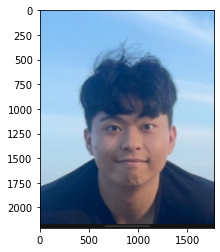

(2208, 1768, 3)


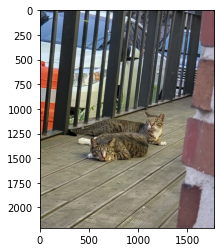

(2208, 1768, 3)


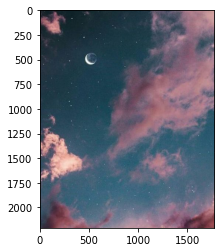

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path=[]
img_orig=[]
for x in [1,2,3]:
    img_path.append(os.getenv('HOME')+f'/aiffel/aiffel/AIFFEL_quest_rs/Exploration/Ex04/image{x}.png') 

    img_orig.append(cv2.imread(img_path[x-1]))


    print(img_orig[x-1].shape)
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
    plt.imshow(cv2.cvtColor(img_orig[x-1], cv2.COLOR_BGR2RGB))
    plt.show()


## Step 1-2.PixelLib에서 제공해 주는 모델 로드

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f9236292bb0>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

## Step 1-3.시맨틱 세그멘테이션 실행

In [5]:
segvalues1, output1 = model.segmentAsPascalvoc(img_path[0])
segvalues2, output2 = model.segmentAsPascalvoc(img_path[1])
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

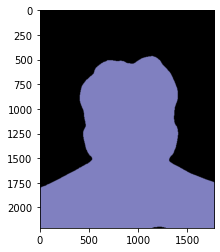

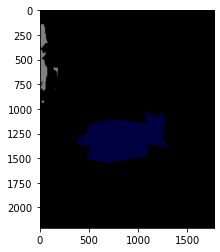

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output1)
plt.show()
plt.imshow(output2)
plt.show()

In [8]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

background
car
cat


In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
seg_color_p = (128,128,192)
seg_color_c = (0,0,64) 
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(2208, 1768)


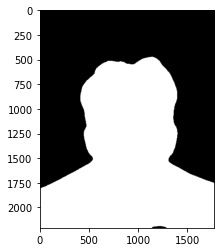

In [12]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_p = np.all(output1==seg_color_p, axis=-1) 
print(seg_map_p.shape) 
plt.imshow(seg_map_p, cmap='gray')
plt.show()

(2208, 1768)


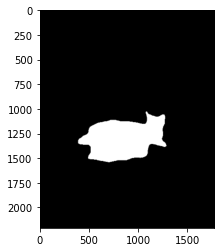

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_c = np.all(output2==seg_color_c, axis=-1) 
print(seg_map_c.shape) 
plt.imshow(seg_map_c, cmap='gray')
plt.show()

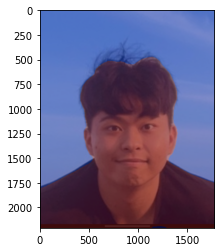

In [14]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show_p = img_orig[0].copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_p = seg_map_p.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_p = cv2.applyColorMap(img_mask_p, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_p = cv2.addWeighted(img_show_p, 0.6, color_mask_p, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_p, cv2.COLOR_BGR2RGB))
plt.show()

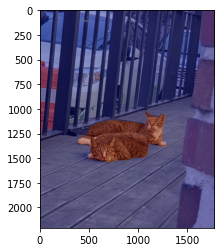

In [15]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show_c = img_orig[1].copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_c = seg_map_c.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_c = cv2.applyColorMap(img_mask_c, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_c = cv2.addWeighted(img_show_c, 0.6, color_mask_c, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_c, cv2.COLOR_BGR2RGB))
plt.show()

## Step 1-4.배경 흐리게 하기

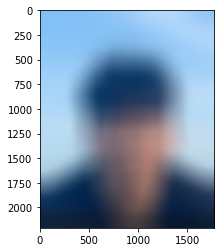

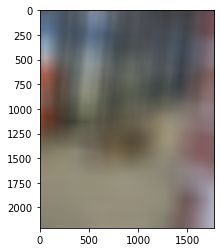

In [16]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur=[]
for x in range(2):
    img_orig_blur.append(cv2.blur(img_orig[x], (300,300)))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
    plt.imshow(cv2.cvtColor(img_orig_blur[x], cv2.COLOR_BGR2RGB))
    plt.show()

## Step 1-5.흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

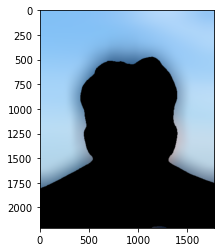

In [17]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color_p = cv2.cvtColor(img_mask_p, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask_p = cv2.bitwise_not(img_mask_color_p)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur_p = cv2.bitwise_and(img_orig_blur[0], img_bg_mask_p)
plt.imshow(cv2.cvtColor(img_bg_blur_p, cv2.COLOR_BGR2RGB))
plt.show()

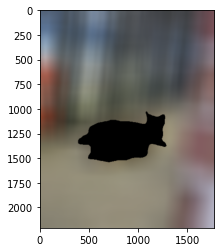

In [18]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color_c = cv2.cvtColor(img_mask_c, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask_c = cv2.bitwise_not(img_mask_color_c)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur_c = cv2.bitwise_and(img_orig_blur[1], img_bg_mask_c)
plt.imshow(cv2.cvtColor(img_bg_blur_c, cv2.COLOR_BGR2RGB))
plt.show()

## Step 1-6.흐린 배경과 원본 영상 합성

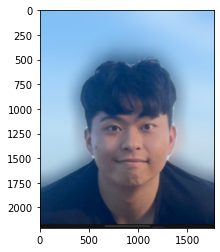

In [19]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat_p = np.where(img_mask_color_p==255, img_orig[0], img_bg_blur_p)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat_p, cv2.COLOR_BGR2RGB))
plt.show()

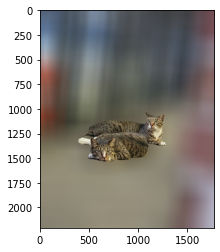

In [20]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat_c = np.where(img_mask_color_c==255, img_orig[1], img_bg_blur_c)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat_c, cv2.COLOR_BGR2RGB))
plt.show()

## Step 1-7.원본 이미지에서 배경 없애기

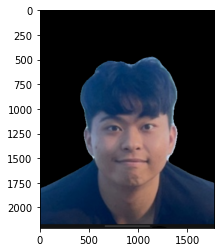

In [21]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_bg_mask_ck = cv2.cvtColor(img_mask_p, cv2.COLOR_GRAY2BGR)


# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 배경이 0인 경우에는 배경이 있던 모든 픽셀이 0이 됩니다. 결국 배경이 사라지고 사람만 남아요!
img_ck = cv2.bitwise_and(img_orig[0], img_bg_mask_ck)
plt.imshow(cv2.cvtColor(img_ck, cv2.COLOR_BGR2RGB))
plt.show()

## Step 1-7.다른 배경과 배경 없앤 영상 합성

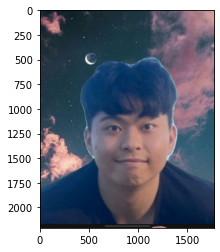

In [22]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 배경 없앤 이미지 값을 가지고 오고 
# 아닌 영역은 다른 배경 이미지 값을 사용합니다.
img_concat_ck = np.where(img_mask_color_p==255, img_ck, img_orig[2])
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat_ck, cv2.COLOR_BGR2RGB))
plt.show()

# Step 2. 사진에서 문제점 찾기

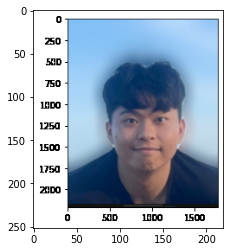

In [25]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

img_path=os.getenv('HOME')+'/aiffel/aiffel/AIFFEL_quest_rs/Exploration/Ex04/sg-1.png' 

img_orig=(cv2.imread(img_path))

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 문제점

1. 흩날리는 머리카락이 표현되지 않고 뭉게짐
2. 객체의 테두리가 깔끔하지 않아 엉성한 느낌이 존재함

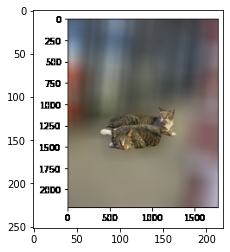

In [26]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

img_path=os.getenv('HOME')+'/aiffel/aiffel/AIFFEL_quest_rs/Exploration/Ex04/sg-2.png' 

img_orig=(cv2.imread(img_path))

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 문제점

1. 뒤에 있는 고양이의 꼬리 부분이 사라져버림


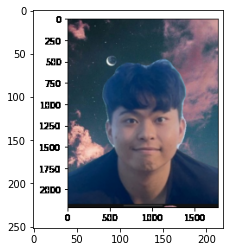

In [27]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

img_path=os.getenv('HOME')+'/aiffel/aiffel/AIFFEL_quest_rs/Exploration/Ex04/sg-3.png' 

img_orig=(cv2.imread(img_path))

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 문제점

1. 흩날리는 머리카락이 표현되지 않고 뭉게짐
2. 객체의 테두리가 깔끔하지 않아 합성한 것이 너무 티남

# Step 3. 해결 방법을 제안해 보기

### 복잡하고 세밀한 요소가 표현되지 않고 뭉게지는 문제

#### 해결가능한 메커니즘

1. Refine Edge Masking -> 모발 같은 세밀한 부분의 가장자리를 보다 정교하게 다듬기 위한 기법
2. Matting Algorithm -> Alpha Matting 같은 고급 기술을 사용하면 투명한 부분이나 작은 디테일을 정확하게 분리 가능

#### 솔루션

1. Refine Edge 도구를 사용하여 경계선 부분을 선택한 뒤, 가장자리를 세밀하게 조정
2. Deep Image Matting과 같은 알고리즘을 사용하면 경계선 부분을 정교하게 분리 가능

### 객체의 테두리가 깔끔하지 않은 문제

#### 해결가능한 메커니즘

1. Edge Refinement -> 가장자리를 부드럽게 하는 작업
2. Feathering & Anti-Aliasing -> 가장자리를 부드럽게 하는 작업

#### 솔루션

1. 객체의 테두리를 Feathering 기법으로 처리하여 경계가 더 부드럽게 이어지도록 함
2. 경계 부분의 Anti-Aliasing을 통해 경계선의 거친 부분을 매끄럽게 만듬

--------------------------------------------------------------------------------------

## 회고

어제에 이어서 CV 프로젝트를 해봤는데 오늘이 조금 더 재미있었던거 같다. 이미지를 누끼?를 따는 방법, 배경을 블러 처리하거나 배경을 바꾸는 작업의 과정을 상세하게 알 수 있어서 좋은 시간이 되었던거 같다.

역시 CV는 재미있다.